In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
#Cargo el datasets y elimino los valores nulos de la columna review_comment_message
df = pd.read_csv('Datasets_original\olist_order_reviews_dataset.csv')
df.dropna(subset="review_comment_message",inplace=True)

In [69]:
# Crear un diccionario para almacenar los conteos de palabras
word_counts = {}

# Iterar sobre las filas del dataframe
for index, row in df.iterrows():
    
    # Obtener el review_score
    review_score = row['review_score']
    
    # Obtener el review_comment_message
    review_comment_message = row['review_comment_message']
    
    # Separar el review_comment_message en palabras
    words = review_comment_message.split()
    
    # Para cada palabra
    for word in words:
        
        # Si el review_score no está en el diccionario, agregarlo
        if review_score not in word_counts:
            word_counts[review_score] = {}
        
        # Si la palabra no está en el diccionario, agregarla
        if word not in word_counts[review_score]:
            word_counts[review_score][word] = 0
        
        # Incrementar el conteo de la palabra
        word_counts[review_score][word] += 1
        
conteo_palabras=pd.DataFrame(word_counts)
conteo_palabras.reset_index(inplace=True,names="Words")

# Imprimir los conteos de palabras
print(conteo_palabras)

             Words       5       4      2       1      3
0           Recebi   583.0   196.0   84.0   329.0  132.0
1              bem  2017.0   423.0   60.0   115.0  179.0
2            antes  4319.0   719.0   52.0   112.0  141.0
3               do  5892.0  1652.0  521.0  1854.0  894.0
4            prazo  3129.0   737.0  137.0   501.0  273.0
...            ...     ...     ...    ...     ...    ...
35093     multiuso     NaN     NaN    NaN     NaN    1.0
35094         15.6     NaN     NaN    NaN     NaN    1.0
35095  vermelha.me     NaN     NaN    NaN     NaN    1.0
35096    preta.nao     NaN     NaN    NaN     NaN    1.0
35097     requinte     NaN     NaN    NaN     NaN    1.0

[35098 rows x 6 columns]


En esta tabla la primer columna words contiene la palabra y el resto de las columnas tienen en su nombre el score, y en el valor de la fila la cantidad de veces que se repite la palabra de la columna words.

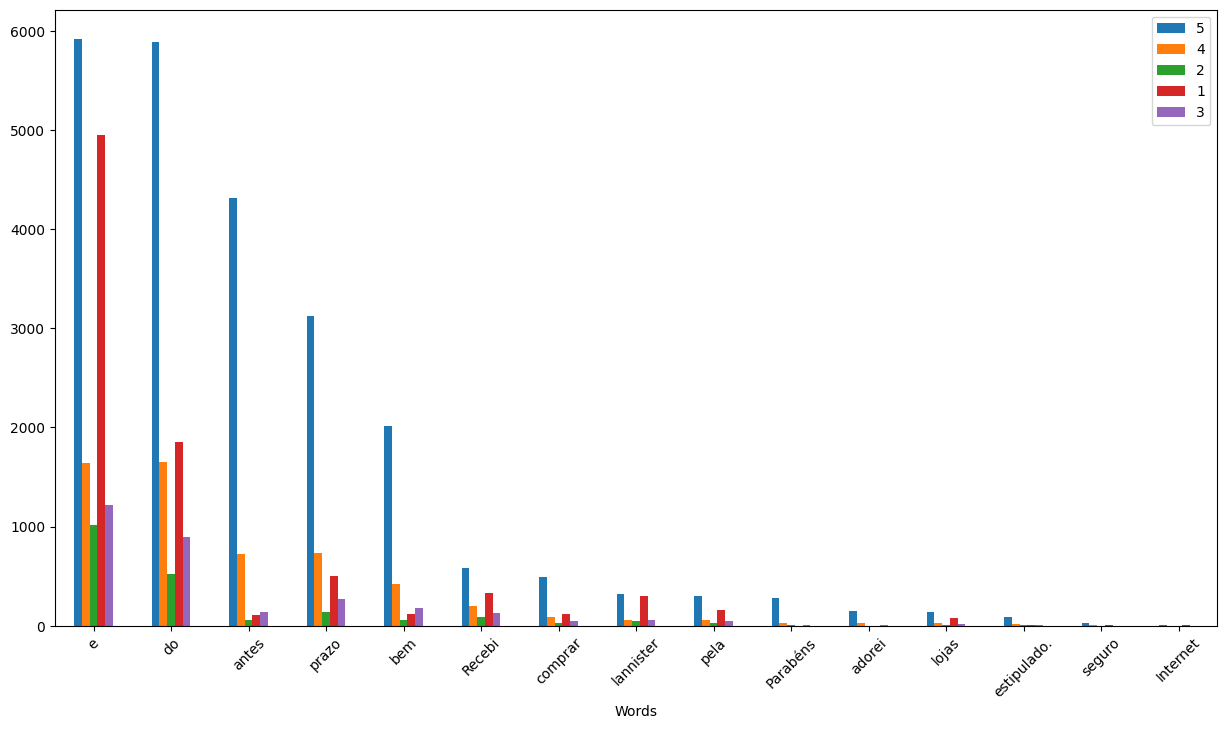

In [70]:
#Hago un grafico con las 15 palabras que mas se repiten ordenadas de mayor a menor por la columna 5
conteo_palabras.head(15).sort_values(by=5,ascending=False).plot.bar(x="Words",figsize=(15,8))
plt.xticks(rotation=45)
plt.show()

A partir de aca probe separar los score en distintas tablas y eliminar los outliers, pero al eliminar outliers se eliminaron tambien palabras importantes.
Faltaria usar una herramienta para traducir las palabras y tambien eliminar datos que no sean palabras o esten mal separados.
Despues usar otra forma de eliminar outlier, como por ejemplo usar quantile(0.95) como valor maximo y quantile(0.05) como valor minimo.

In [71]:

score_5=conteo_palabras[["Words",5]].sort_values(by=5,ascending=False)

IQR = score_5[5].quantile(0.75) - score_5[5].quantile(0.25)
mínimo = score_5[5].quantile(0.25) - 1.5 * IQR
máximo = score_5[5].quantile(0.75) + 1.5 * IQR

score_5 = score_5[(score_5[5] > mínimo) & (score_5[5] < máximo)]
score_5.sort_values(by=5,ascending=False)

,Words,5
12084,coração,3.0
1962,antes!!,3.0
8312,fofo,3.0
8309,também!,3.0
2541,busca,3.0
...,...,...
13075,Profissionais,1.0
13076,satisfesta,1.0
13415,.Deve,1.0
13070,T664.,1.0


In [72]:
score_4=conteo_palabras[["Words",4]].sort_values(by=4,ascending=False)

IQR = score_4[4].quantile(0.75) - score_4[4].quantile(0.25)
mínimo = score_4[4].quantile(0.25) - 1.5 * IQR
máximo = score_4[4].quantile(0.75) + 1.5 * IQR

score_4 = score_4[(score_4[4] > mínimo) & (score_4[4] < máximo)]
score_4.sort_values(by=4,ascending=False)

,Words,4
15797,"Casio,",3.0
5547,sinto,3.0
14958,marcação,3.0
2408,anos.,3.0
5572,valeu.,3.0
...,...,...
18929,"experimental,",1.0
18930,dele!,1.0
18931,ando,1.0
18932,cansado,1.0


In [73]:
score_3=conteo_palabras[["Words",3]].sort_values(by=3,ascending=False)

IQR = score_3[3].quantile(0.75) - score_3[3].quantile(0.25)
mínimo = score_3[3].quantile(0.25) - 1.5 * IQR
máximo = score_3[3].quantile(0.75) + 1.5 * IQR

score_3 = score_3[(score_3[3] > mínimo) & (score_3[3] < máximo)]
score_3.sort_values(by=3,ascending=False)

,Words,3
17899,acrílico,3.0
6246,segurança,3.0
15213,produto?,3.0
15084,sensor,3.0
2004,Pena,3.0
...,...,...
34815,DOCUMENTO,1.0
34840,"lógica,",1.0
34841,mdjdubdhdudbbshsisbsbjsusbshdidbdbdj,1.0
34842,"pérola,",1.0


In [74]:
score_2=conteo_palabras[["Words",2]].sort_values(by=2,ascending=False)

IQR = score_2[2].quantile(0.75) - score_2[2].quantile(0.25)
mínimo = score_2[2].quantile(0.25) - 1.5 * IQR
máximo = score_2[2].quantile(0.75) + 1.5 * IQR

score_2 = score_2[(score_2[2] > mínimo) & (score_2[2] < máximo)]
score_2.sort_values(by=2,ascending=False)

,Words,2
6896,trocar.,3.0
4287,pequenos,3.0
1289,cliente.,3.0
645,imaginei,3.0
134,rápida,3.0
...,...,...
21866,"esperada,",1.0
22045,104,1.0
21867,rigoroso.,1.0
21868,refletem,1.0


In [75]:
score_1=conteo_palabras[["Words",1]].sort_values(by=1,ascending=False)

IQR = score_1[1].quantile(0.71) - score_1[1].quantile(0.21)
mínimo = score_1[1].quantile(0.21) - 1.1 * IQR
máximo = score_1[1].quantile(0.71) + 1.1 * IQR

score_1 = score_1[(score_1[1] > mínimo) & (score_1[1] < máximo)]
score_1.sort_values(by=1,ascending=False)

,Words,1
221,declarar,3.0
21777,ENTRAR,3.0
22367,unissex,3.0
25063,canais,3.0
7118,HAVIA,3.0
...,...,...
31624,determinadas,1.0
31625,"boleto,",1.0
32158,"RECEBERMOS,",1.0
31626,postado.,1.0
